<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:purple; overflow:hidden"><b> NTT Stock Price Prediction </b></div>
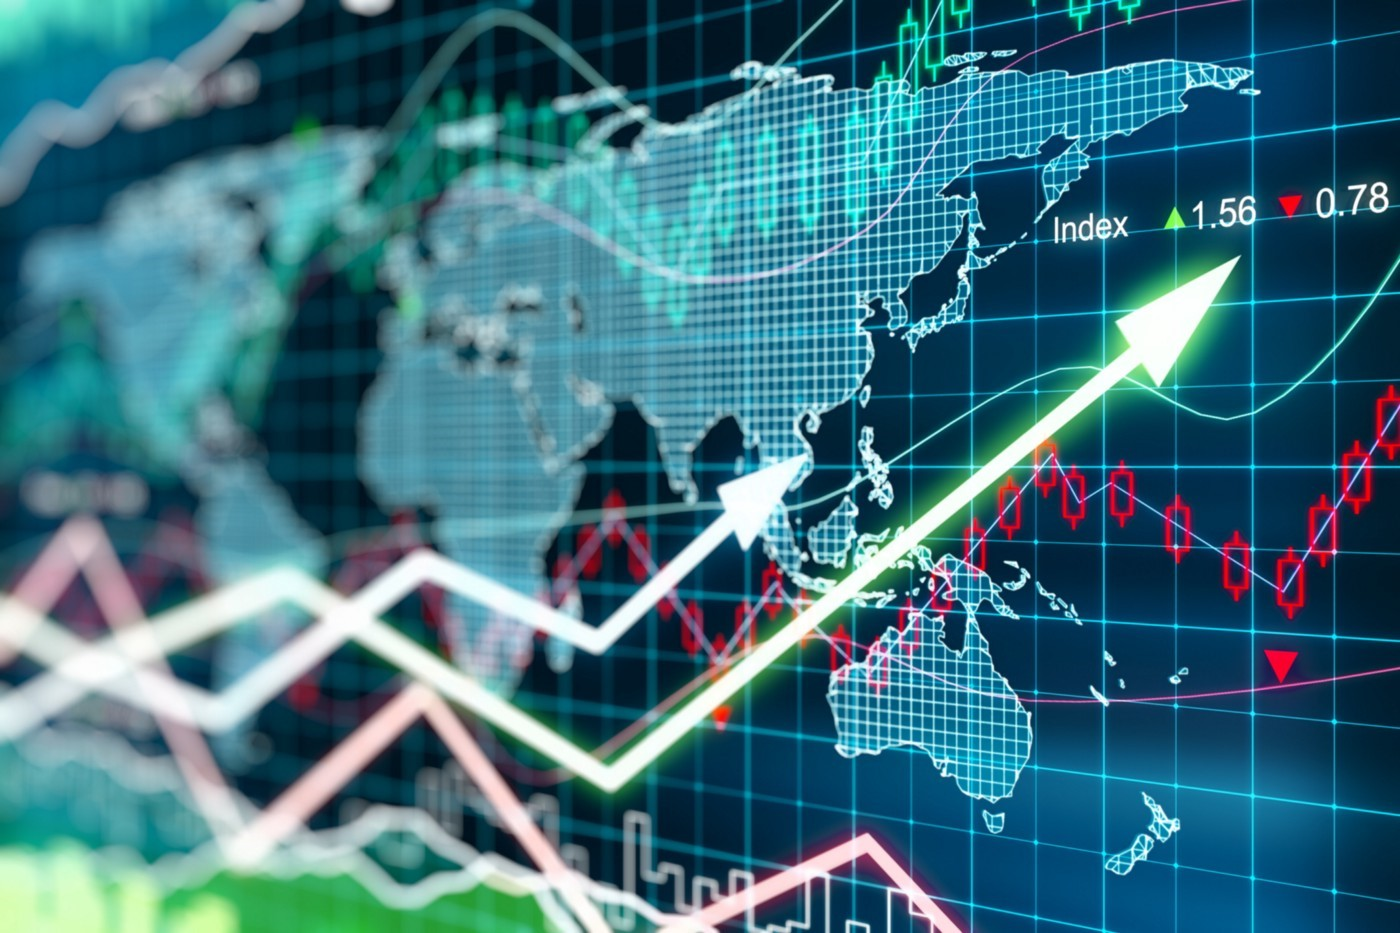

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:purple; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#libraries">1. Import Libraries📚</a>
- <a href="#data">2. Read and analyze the Data🔃</a>
    - <a href="#stat">2.1. Data Statistics</a> 
- <a href="#visual">3. Data Visualization📊</a>
- <a href="#preprocessing">4. Data Preprocessing📝</a>
    - <a href="#sep">4.1. Separate features and labels</a>   
- <a href="#build">5. Build ML models and Evaluation🧠</a> 
- <a href="#ANN">6. LSTM Model for Time Series Forecasting</a> 
- <a href="#conclusion">7. Conclusion🎯</a> 

<a id='libraries'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBLue; overflow:hidden"><b> 1. Import libraries 📚</b></div>

In [420]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler

# LSTM model from TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data visualization
import matplotlib.pyplot as plt

# Metrics for evaluation
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier


<a id="data"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:purple;overflow:hidden"><b>2. Read and analyze the Data🔃</b></div>

In [421]:
file_path = "/kaggle/input/ntt-stock-price-prediction/stock_price.xlsx" 
data = pd.read_excel(file_path)
print(data.head())


        Date  Closing Price  Opening Price  High Price  Low Price   Volume  \
0 2024-08-01          156.3          159.3       159.4      156.1   79.15M   
1 2024-07-31          160.4          158.2       160.7      158.1  173.91M   
2 2024-07-30          158.7          158.8       159.2      158.0  138.14M   
3 2024-07-29          159.7          158.7       160.2      158.4  126.28M   
4 2024-07-26          157.9          159.3       159.6      157.9  155.08M   

   Percentage Change  
0            -0.0256  
1             0.0107  
2            -0.0063  
3             0.0114  
4            -0.0013  


In [422]:
data.shape

(9202, 7)

In [423]:
data.isnull().sum()

Date                 0
Closing Price        0
Opening Price        0
High Price           0
Low Price            0
Volume               0
Percentage Change    0
dtype: int64

<a id='stat'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:purple; overflow:hidden"><b> 2.1. Data Statistics  </b></div>

In [424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               9202 non-null   datetime64[ns]
 1   Closing Price      9202 non-null   float64       
 2   Opening Price      9202 non-null   float64       
 3   High Price         9202 non-null   float64       
 4   Low Price          9202 non-null   float64       
 5   Volume             9202 non-null   object        
 6   Percentage Change  9202 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 503.4+ KB


In [425]:
data.describe()

Date  Closing Price  Opening Price  \
count                           9202    9202.000000    9202.000000   
mean   2005-10-21 08:44:04.642469248      92.180961      92.256183   
min              1987-02-12 00:00:00      33.000000      33.000000   
25%              1996-06-06 06:00:00      52.000000      52.100000   
50%              2005-10-11 12:00:00      85.100000      85.100000   
75%              2015-03-04 18:00:00     110.800000     110.800000   
max              2024-08-01 00:00:00     305.900000     309.800000   
std                              NaN      50.452228      50.598215   

        High Price    Low Price  Percentage Change  
count  9202.000000  9202.000000        9202.000000  
mean     93.176451    91.330146           0.000175  
min      33.200000    32.200000          -0.147400  
25%      52.800000    51.500000          -0.009400  
50%      86.050000    84.200000           0.000000  
75%     111.900000   109.275000           0.009000  
max     311.800000   303.900000           0.162500  
std      51.049837    50.087405           0.018767

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #DDA0DD;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>The dataset contains a total of <strong>9202 rows</strong> and <strong>7 columns</strong>, where there are <strong>6 features</strong> and <strong>1 label</strong>.</li>
        <li>All values in the dataset are <strong>non-null</strong> and <strong>numerical</strong>.</li>
        <li>The target variable is represented by the column: <strong>Percentage Change</strong>.</li>
    </ul>
</div>

<a id="visual"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:purple;overflow:hidden"><b>3. Data Visualization📊</b></div>

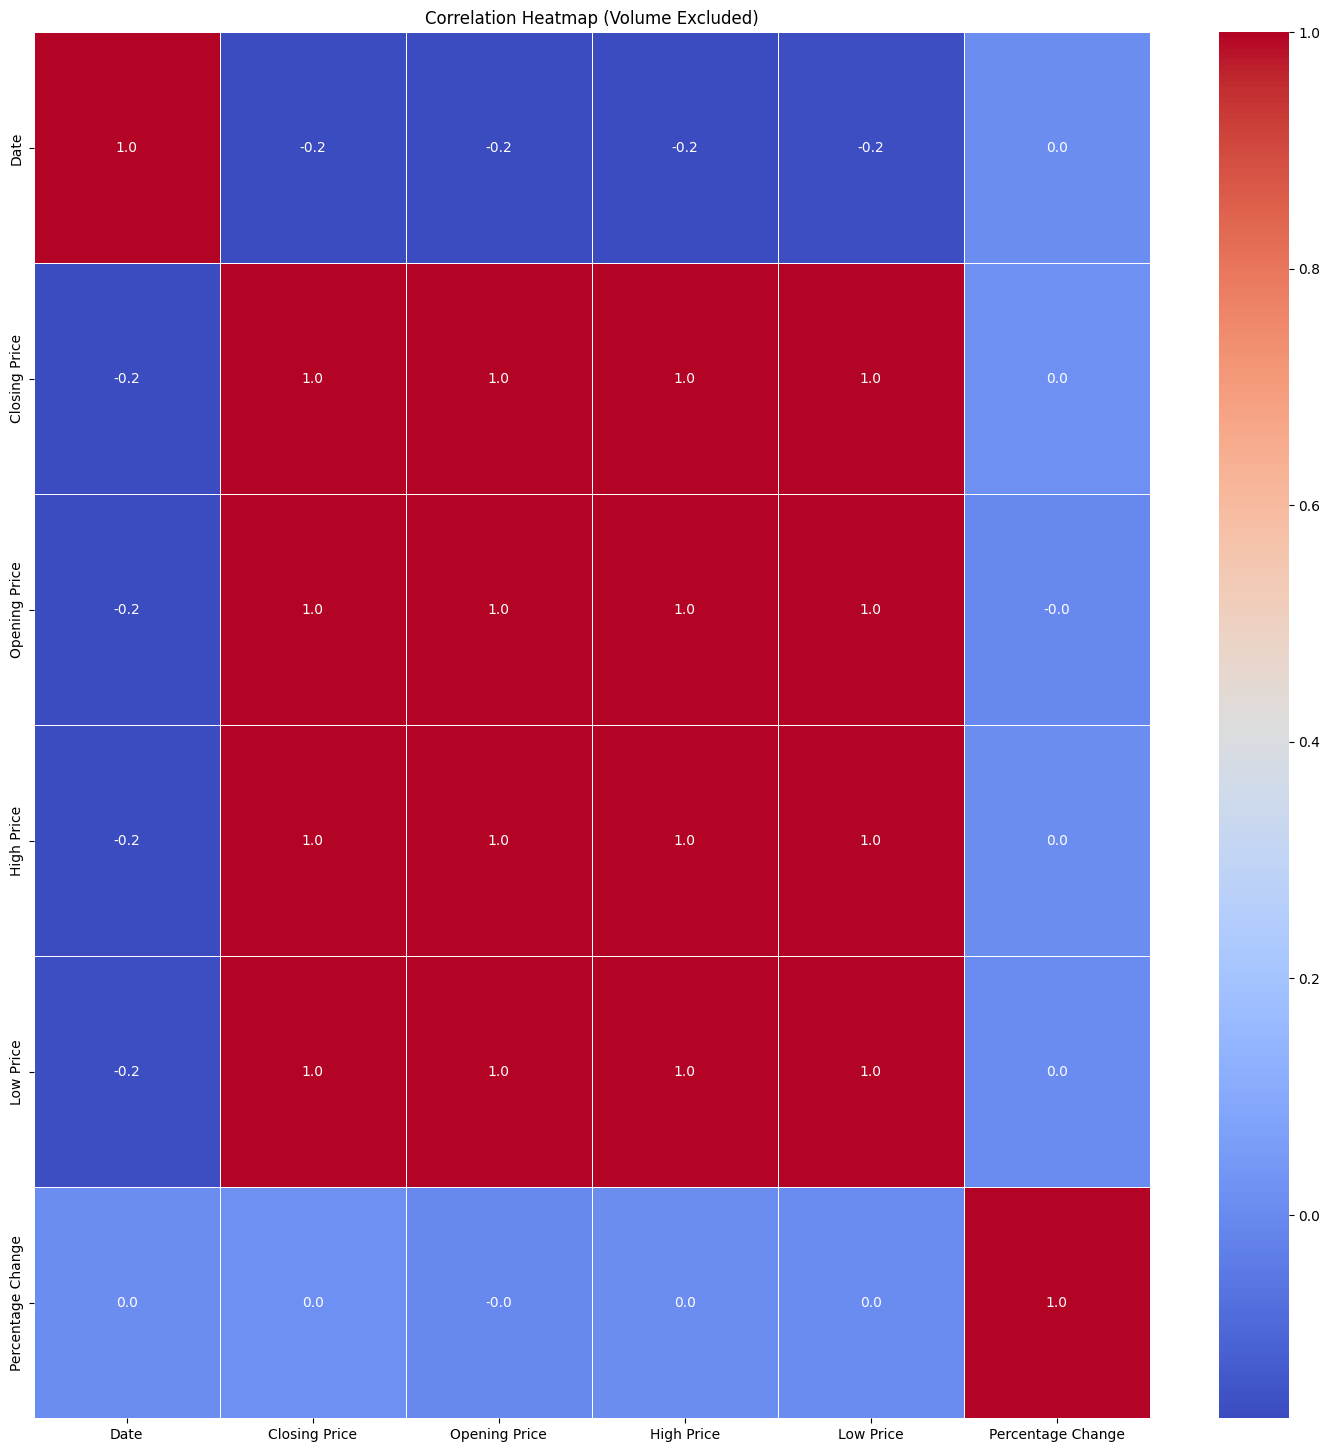

In [426]:
data_cleaned = data.drop(columns=['Volume'], errors='ignore')  
correlation_matrix = data_cleaned.corr()

# Step 3: Create the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.1f', cmap='coolwarm')  # You can change the colormap if desired
plt.title('Correlation Heatmap (Volume Excluded)')
plt.show()


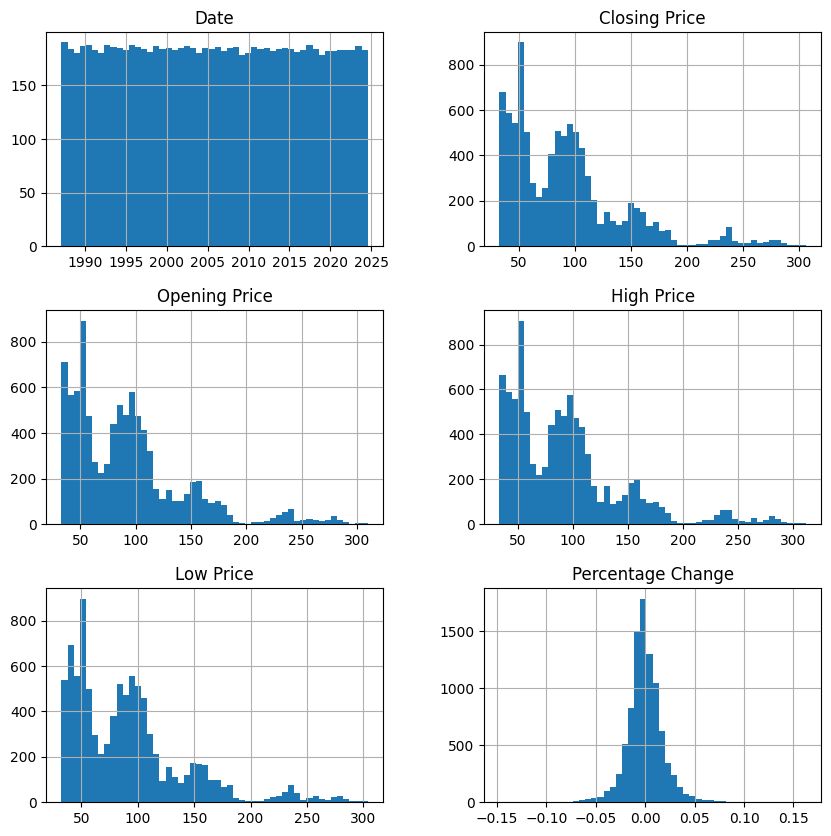

In [427]:
data.hist(figsize=(10,10),bins=50)
plt.show()

In [428]:
features = data.columns[:-1].values
label = [data.columns[-1]]

print ("The Features are:", features)
print ("The Label is:", label)

The Features are: ['Date' 'Closing Price' 'Opening Price' 'High Price' 'Low Price' 'Volume']
The Label is: ['Percentage Change']


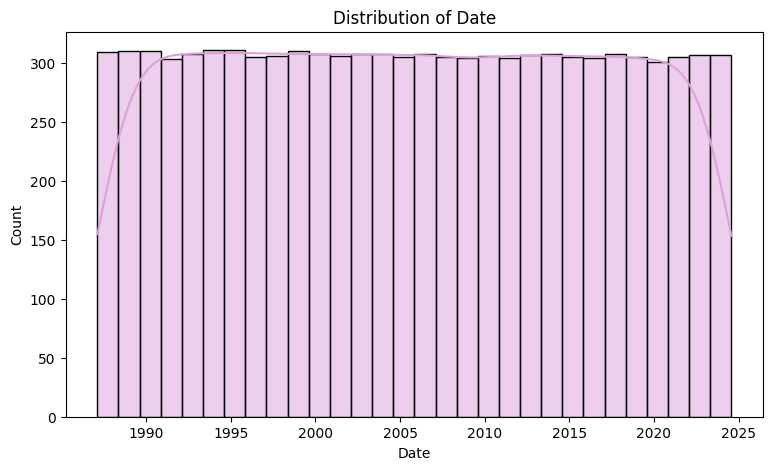

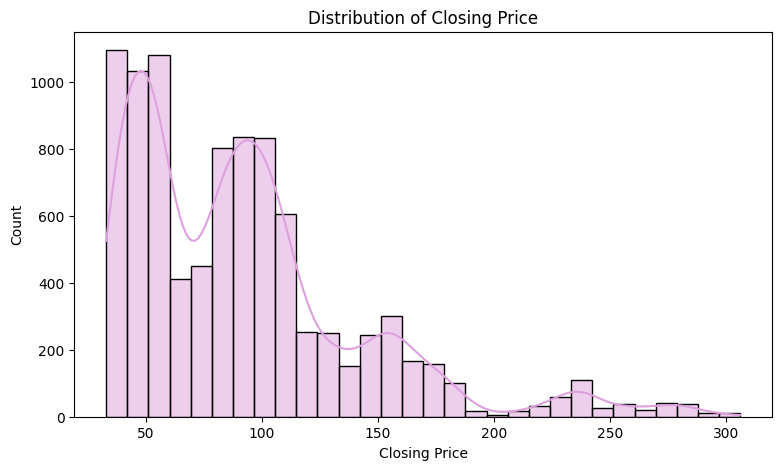

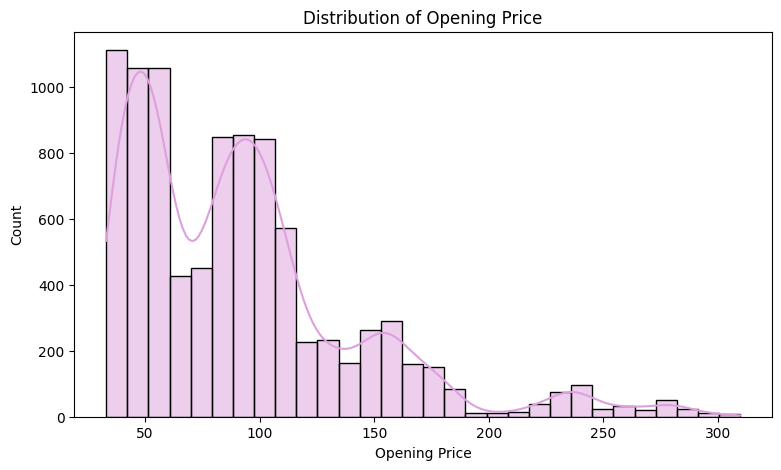

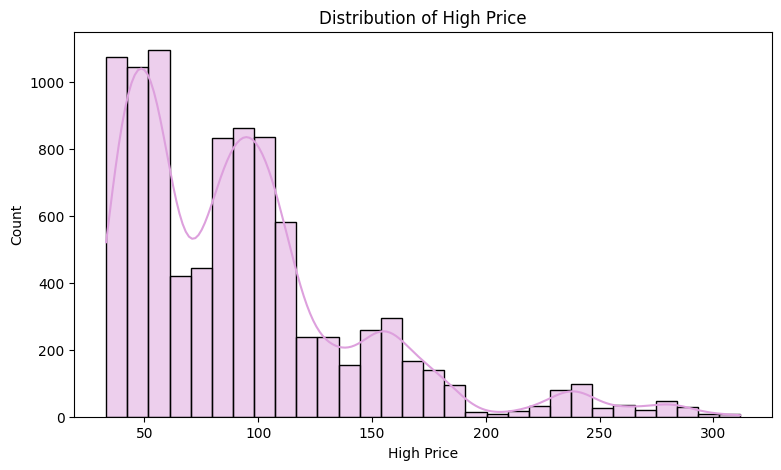

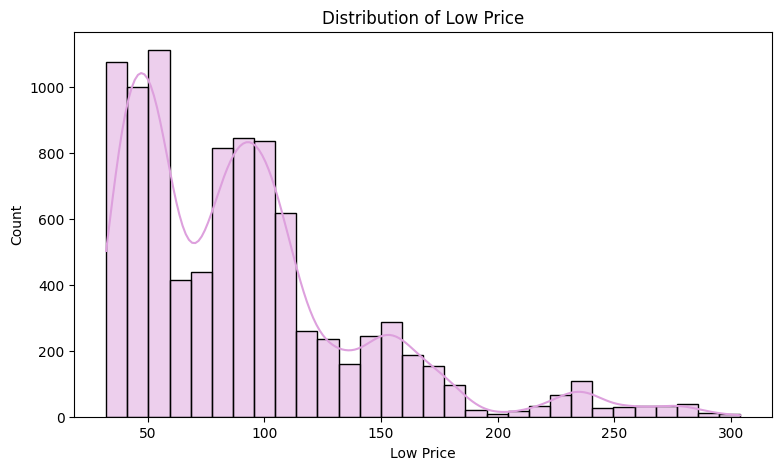

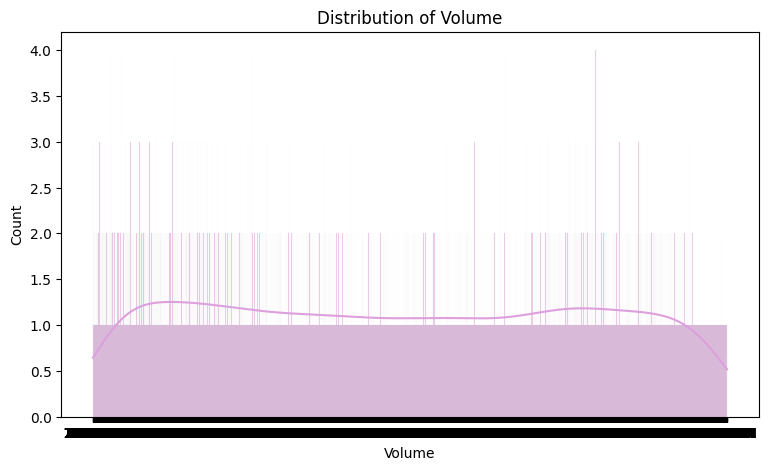

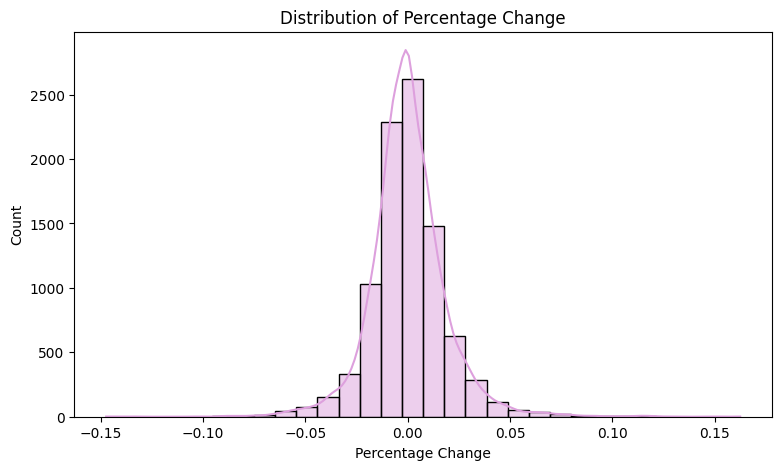

In [429]:
data_cleaned = data.drop(columns=['Volume'], errors='ignore')  
for column in data:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='#DDA0DD')
    plt.title(f'Distribution of {column}')
    plt.show()

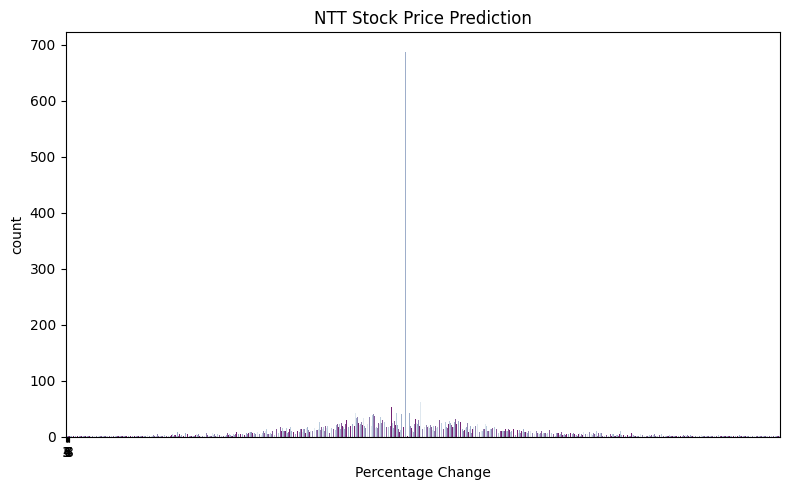

In [430]:
# Set custom labels
labels = ["3", "4", "5", "6", "7", "8"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=data, x='Percentage Change', ax=ax, palette=sns.color_palette("BuPu"))
ax.set_title('NTT Stock Price Prediction')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<a id="preprocessing"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:purple;overflow:hidden"><b>4. Data preprocessing📝</b></div>

In [431]:
x=data.iloc[:,:-1]
y=data["Percentage Change"]

In [432]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [433]:
x

Date  Closing Price  Opening Price  High Price  Low Price   Volume
0    2024-08-01          156.3          159.3       159.4      156.1   79.15M
1    2024-07-31          160.4          158.2       160.7      158.1  173.91M
2    2024-07-30          158.7          158.8       159.2      158.0  138.14M
3    2024-07-29          159.7          158.7       160.2      158.4  126.28M
4    2024-07-26          157.9          159.3       159.6      157.9  155.08M
...         ...            ...            ...         ...        ...      ...
9197 1987-02-18          191.2          186.3       191.2      186.3  795.09M
9198 1987-02-17          182.4          176.5       184.3      175.5  881.51M
9199 1987-02-16          175.5          166.7       175.5      165.7  360.51M
9200 1987-02-13          172.5          176.5       176.5      172.5  422.38M
9201 1987-02-12          182.4          182.4       182.4      182.4    1.28B

[9202 rows x 6 columns]

In [434]:
y

0      -0.0256
1       0.0107
2      -0.0063
3       0.0114
4      -0.0013
         ...  
9197    0.0482
9198    0.0393
9199    0.0174
9200   -0.0543
9201    0.1625
Name: Percentage Change, Length: 9202, dtype: float64

<a id='sep'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:purple; overflow:hidden"><b> 4.1. Separate features and labels  </b></div>


In [435]:
x_train.shape

(6441, 6)

In [436]:
y_train.shape[0]

6441

In [437]:
x_test.shape

(2761, 6)

In [438]:
y_test.shape[0]

2761

<a id="build"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:purple;overflow:hidden"><b>5. Build ML models and Evaluation🧠</b></div>

Training Decision Tree...
Decision Tree R² Score: 2.25%

Training Random Forest...
Random Forest R² Score: 37.78%

Training Gradient Boosting...
Gradient Boosting R² Score: 10.39%

Training AdaBoost...
AdaBoost R² Score: -2.38%

Training K-Nearest Neighbors...
K-Nearest Neighbors R² Score: -20.73%

Training Linear Regression...
Linear Regression R² Score: -0.07%

Training SGD Regressor...
SGD Regressor R² Score: -2772487391720051191949045509547017693396654342901947112199832478849403998811907398451299614720.00%

Training Support Vector Machine...
Support Vector Machine R² Score: -36.70%

Training CatBoost...
CatBoost R² Score: 33.30%



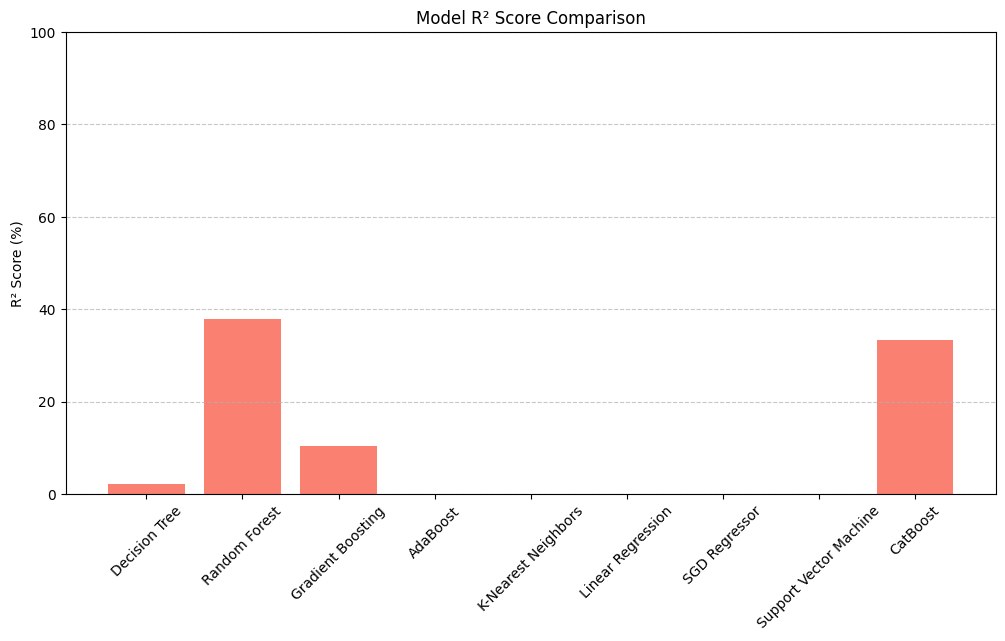

In [439]:
# Store R² scores
r2_scores = []

# Train and evaluate regression models
for name, model in Regression_models.items():
    print(f"Training {name}...")
    model.fit(x_train_cleaned, y_train) 
    predictions = model.predict(x_test_cleaned) 
    r2_score_value = model.score(x_test_cleaned, y_test) 
    r2_scores.append(r2_score_value * 100)  
    print(f"{name} R² Score: {r2_score_value * 100:.2f}%\n")

# Plotting R² score vs model in vertical direction
plt.figure(figsize=(12, 6))
plt.bar(list(Regression_models.keys()), r2_scores, color='salmon')
plt.ylabel('R² Score (%)') 
plt.title('Model R² Score Comparison')
plt.ylim(0, 100)  
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


Training Decision Tree...
Decision Tree Accuracy: 66.21%

Training Random Forest...
Random Forest Accuracy: 69.25%

Training Gradient Boosting...
Gradient Boosting Accuracy: 62.98%

Training AdaBoost...
AdaBoost Accuracy: 55.12%

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 50.71%

Training Logistic Regression...
Logistic Regression Accuracy: 52.16%

Training SGD Classifier...
SGD Classifier Accuracy: 52.16%

Training Support Vector Machine...
Support Vector Machine Accuracy: 52.16%

Training CatBoost...
CatBoost Accuracy: 70.34%



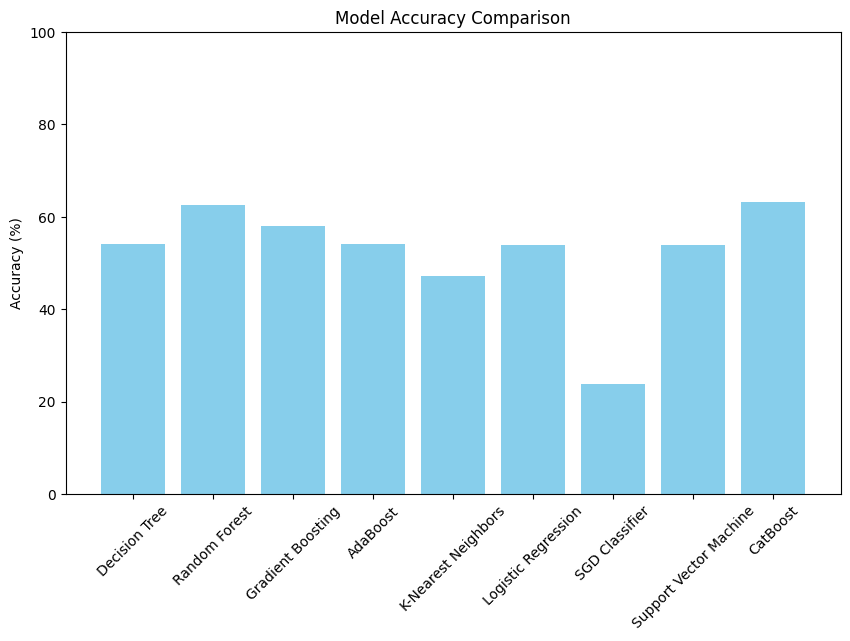

In [440]:
# Example: Converting continuous y_train into categories using binning (you can adjust bins according to your data)
import numpy as np
y_train_binned = np.digitize(y_train, bins=[0, 100, 200, 300, 400])  # Define bins as per your data range
y_test_binned = np.digitize(y_test, bins=[0, 100, 200, 300, 400])

# Train and evaluate the models with binned labels
for name, model in Classification_models.items():
    print(f"Training {name}...")
    model.fit(x_train_cleaned, y_train_binned)  # Training the model
    predictions = model.predict(x_test_cleaned)  # Making predictions on the test set
    accuracy = accuracy_score(y_test_binned, predictions)  # Evaluating accuracy
    print(f"{name} Accuracy: {accuracy * 100:.2f}%\n")

# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
plt.bar(list(accuracies.keys()), [acc * 100 for acc in accuracies.values()], color='skyblue')
plt.ylabel('Accuracy (%)')  # Change y-axis label
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-ticks for better visibility
plt.show()


In [443]:
for name, preds in predictions_dict.items():
    print(f"\nPredictions from {name}:")
    print(preds)


Predictions from Decision Tree:
['Medium' 'High' 'Medium' ... 'Medium' 'High' 'Medium']

Predictions from Random Forest:
['Medium' 'High' 'Medium' ... 'Medium' 'High' 'Medium']

Predictions from Gradient Boosting:
['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']

Predictions from AdaBoost:
['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']

Predictions from K-Nearest Neighbors:
['Medium' 'High' 'Medium' ... 'High' 'High' 'Medium']

Predictions from Logistic Regression:
['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']

Predictions from SGD Classifier:
['Low' 'Low' 'Low' ... 'Low' 'Low' 'Low']

Predictions from Support Vector Machine:
['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']

Predictions from CatBoost:
[['Medium']
 ['Medium']
 ['Medium']
 ...
 ['Medium']
 ['High']
 ['Medium']]


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #DDA0DD;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em; ">
        <li><strong>The best accuracy was obtained by using the CatBoost Accuracy model.</li>
    </ul>
</div>

<a id="ANN"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:purple;overflow:hidden"><b>6. LSTM Model for Time Series Forecasting💹</b></div>

In [442]:
print(data.columns)

Index(['Date', 'Closing Price', 'Opening Price', 'High Price', 'Low Price',
       'Volume', 'Percentage Change'],
      dtype='object')


In [291]:
# Prepare data
data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
prices = data['Closing Price'].values

# Normalize and create dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(prices.reshape(-1, 1))
X, y = [], []

for i in range(len(scaled_data) - 60 - 1):
    X.append(scaled_data[i:(i + 60), 0])
    y.append(scaled_data[i + 60, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    LSTM(50),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=1, epochs=10)

Epoch 1/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 175s 19ms/step - loss: 0.0010
Epoch 2/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 172s 19ms/step - loss: 2.4286e-04
Epoch 3/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 172s 19ms/step - loss: 1.7570e-04
Epoch 4/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 171s 19ms/step - loss: 1.4231e-04
Epoch 5/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 174s 19ms/step - loss: 1.3191e-04
Epoch 6/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 173s 19ms/step - loss: 1.0575e-04
Epoch 8/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 173s 19ms/step - loss: 1.0524e-04
Epoch 9/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 172s 19ms/step - loss: 1.2484e-04
Epoch 10/10
9141/9141 ━━━━━━━━━━━━━━━━━━━━ 172s 19ms/step - loss: 1.0371e-04


286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
LSTM RMSE: 2.353616644600261


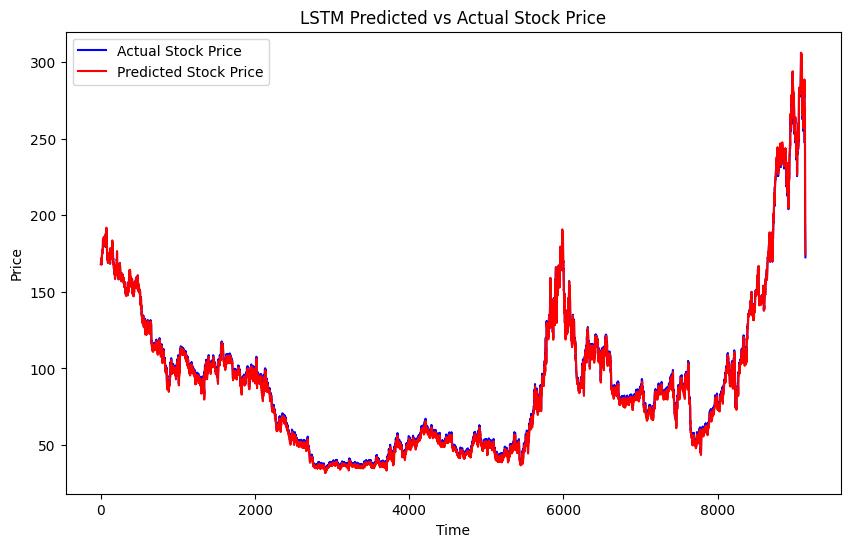

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict stock prices
predictions = model.predict(X)

# Inverse transform predictions and actual prices
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate and print RMSE
print(f'LSTM RMSE: {np.sqrt(mean_squared_error(actual_prices, predictions))}')

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Stock Price', color='blue')
plt.plot(predictions, label='Predicted Stock Price', color='red')
plt.title('LSTM Predicted vs Actual Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

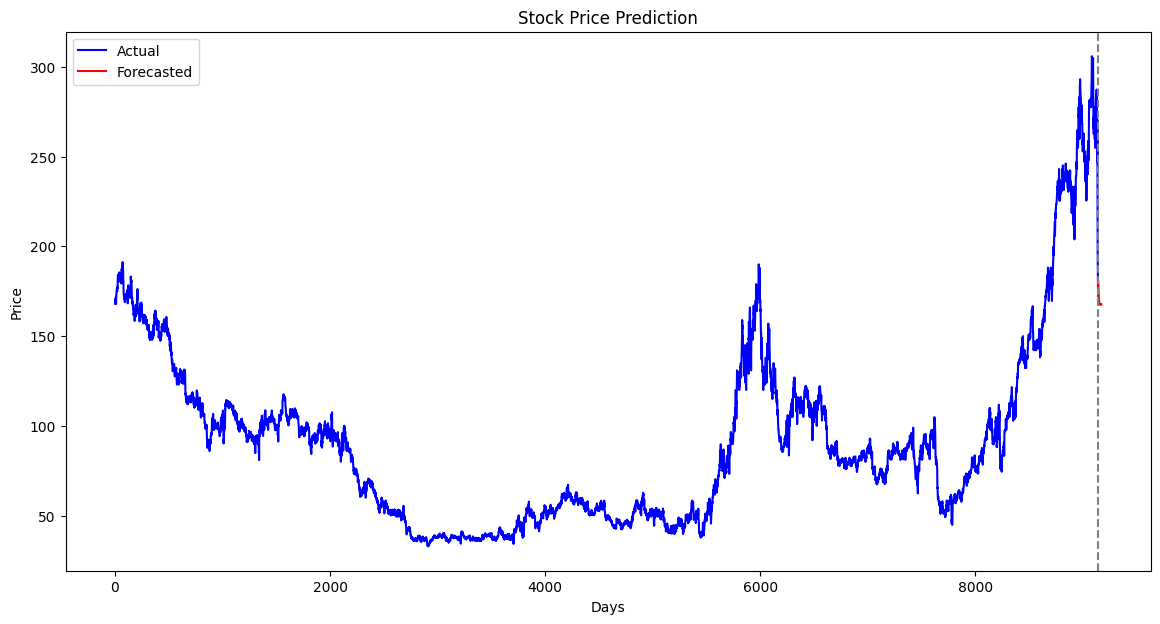

In [ ]:
# Number of days to forecast
num_days_to_forecast = 30

# Prepare the last `time_step` days of data for forecasting
last_days = scaled_data[-time_step:].reshape(1, time_step, 1)

# Forecast the next `num_days_to_forecast` days
forecasted_prices = []
for _ in range(num_days_to_forecast):
    predicted_price = model.predict(last_days)
    forecasted_prices.append(predicted_price[0, 0])
    
    # Update the input for the next prediction
    last_days = np.append(last_days[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Inverse transform the forecasted prices
forecasted_prices = scaler.inverse_transform(np.array(forecasted_prices).reshape(-1, 1))

# Print the forecasted prices
print(f"Forecasted stock prices for the next {num_days_to_forecast} days:\n", forecasted_prices.flatten())
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual', color='blue')
plt.plot(np.arange(len(actual_prices), len(actual_prices) + num_days_to_forecast), forecasted_prices, label='Forecasted', color='red')
plt.axvline(x=len(actual_prices)-1, color='gray', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


<a id="conclusion"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:purple;overflow:hidden"><b>7. Conclusion🎯</b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #DDA0DD;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em; ">
        <li><strong>The evaluation of various models revealed that CatBoost Accuracy emerged as the best performer with an accuracy of 70.34%, closely followed by Random Forest at 69.25% and Decision Tree at 66.21%. In contrast, K-Nearest Neighbors exhibited poor performance at 50.71%, while both AdaBoost and Support Vector Machine also demonstrated weak results, with accuracies of 55.12% and 52.16%, respectively.<li><strong>Regarding regression analysis, Random Forest achieved the highest R² score of 37.78%, while several models, including AdaBoost (-2.38%) and K-Nearest Neighbors (-20.73%), displayed negative R² scores, indicating a poor fit for the data.  <li><strong>The LSTM model demonstrated a Root Mean Squared Error (RMSE) of 2.35.  <li><strong>Predicting a consistent decline in stock prices over the next 30 days, starting at 180.44 and gradually decreasing to 167.76. Overall, traditional models are effective for classification tasks, while the LSTM model shows promise for time series forecasting.

</strong></li>
    </ul>
</div>